In [1]:
import torch
torch.cuda.is_available()

True

In [22]:
import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets
from PIL import Image

In [7]:
# Getting ready files
# !git clone https://github.com/EscVM/OIDv4_ToolKit
# !cd OIDv4_ToolKit && pip install -r requirements.txt
# !cd OIDv4_ToolKit && python main.py -h
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 37721 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

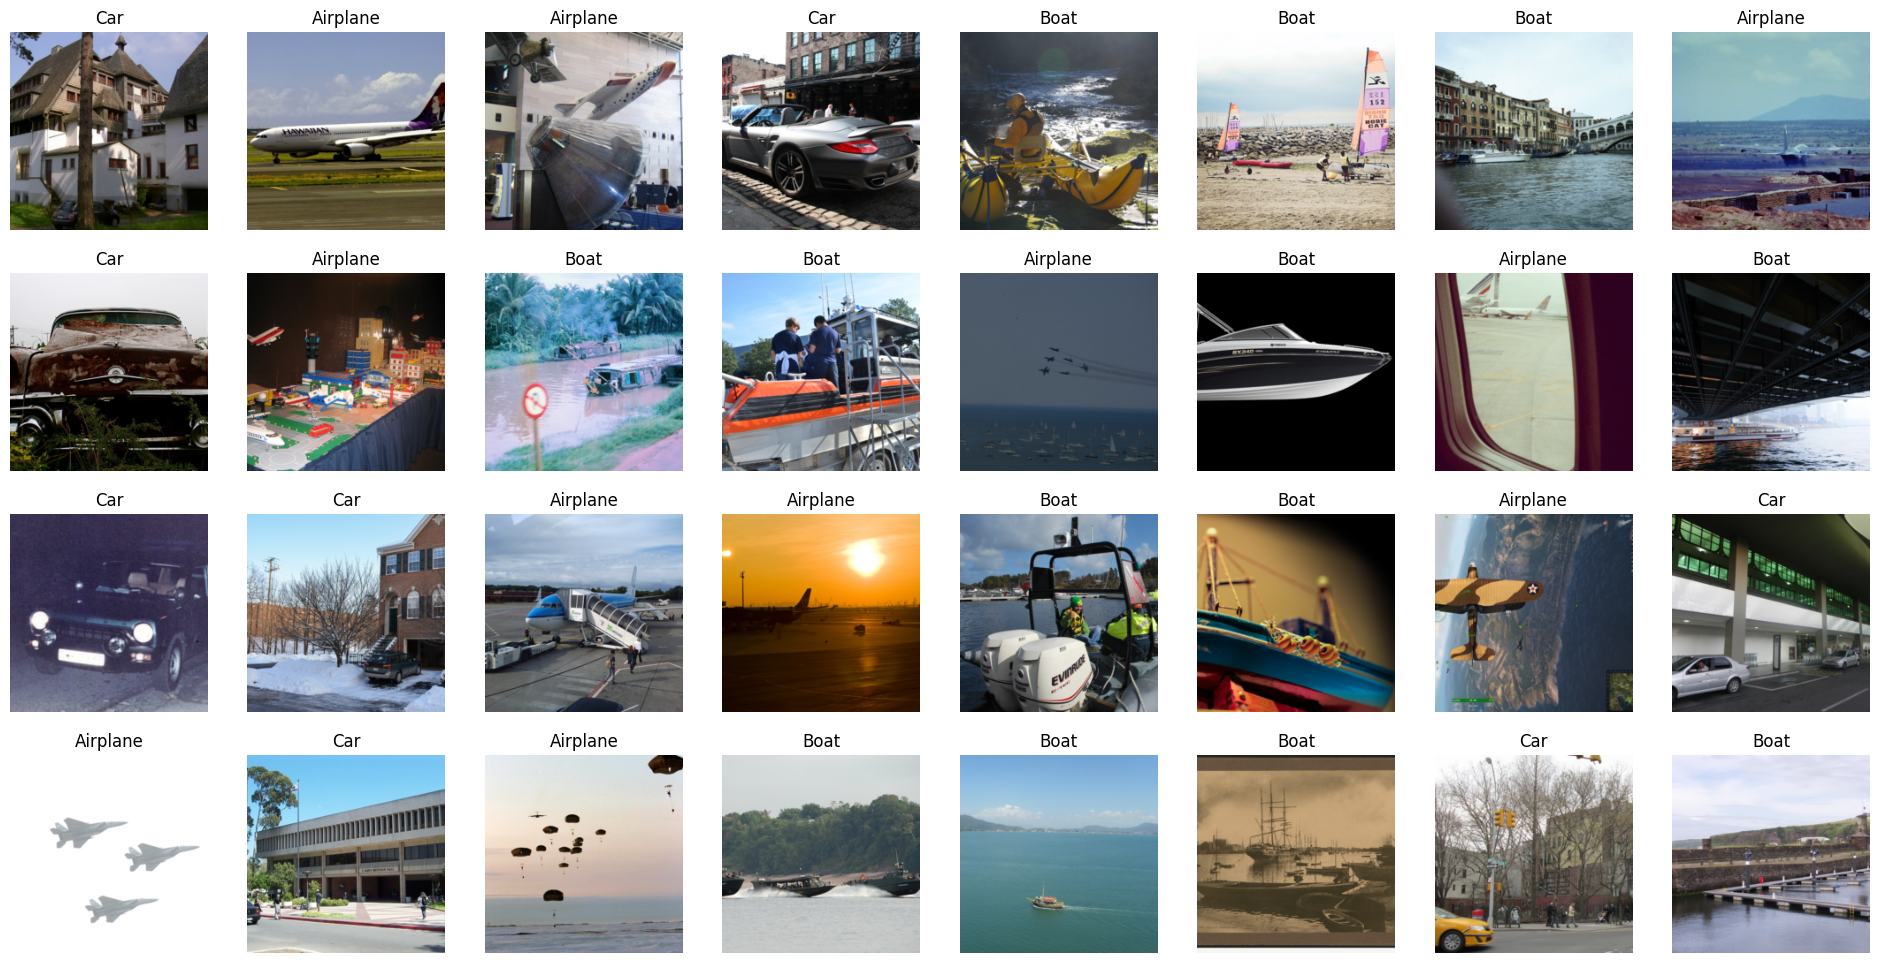

In [12]:
# Path
path = Path('train')
# fls = get_image_files(path)
# failed = verify_images(path)

# Create DataBlock
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=30),
    get_y= parent_label,
    item_tfms=Resize(224)
)

# Data Loader
dls = transports.dataloaders(path)

# check dataset
dls.train.show_batch(max_n=32, nrows=4)

In [13]:
# Learn & Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 74.0MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.415796,0.301001,0.883333,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.465780,0.189411,0.933333,00:09
1,0.325454,0.198674,0.941667,00:08
2,0.229565,0.209928,0.925000,00:08
3,0.176412,0.212848,0.925000,00:09


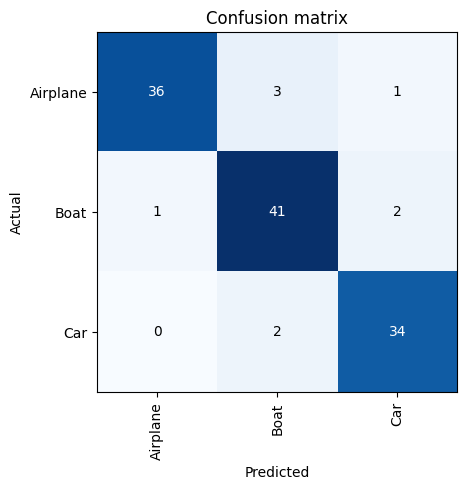

In [14]:
# Interpretation # Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

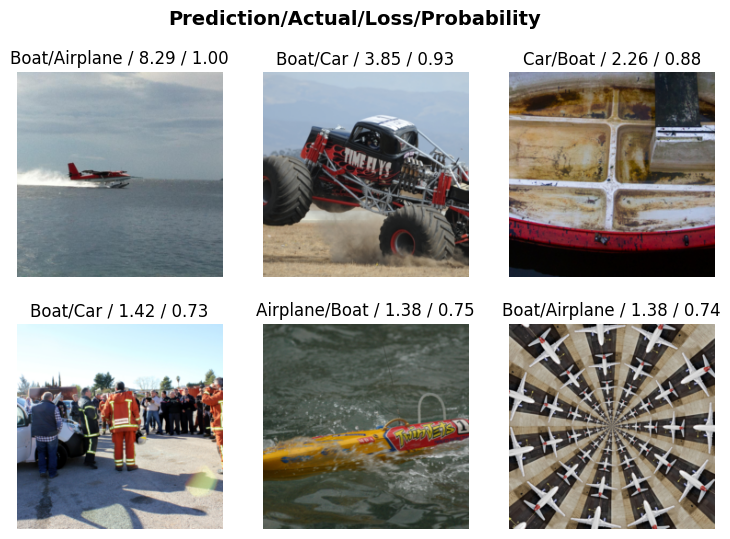

In [16]:
# See Top Loss
interp.plot_top_losses(6, nrows=2)

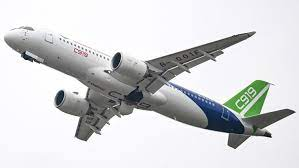

In [68]:
# check the models manually
img1 = Image.open('/content/1.jpg')
img2 = Image.open('/content/2.jpg')
img3 = Image.open('/content/3.jpg')
img3 # image 3 airplane

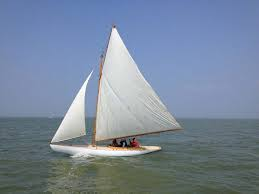

In [69]:
img2 # image 2 boat

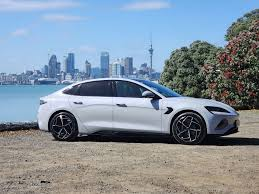

In [70]:
img1 # image 1 car

In [74]:
def predict_pic(img):
  pred, pred_id, probs = learn.predict(img)
  print(f"Prediction: {pred}")
  print(f"Probability: {probs[pred_id]*100:.1f}%")

predict_pic(img3) # airplane
predict_pic(img2) # boat
predict_pic(img1) # car

Prediction: Airplane
Probability: 100.0%


Prediction: Boat
Probability: 100.0%


Prediction: Car
Probability: 100.0%
